## Sección 13: Árboles de decisión en Machine Learning

<details>
<summary><strong>📊 DTs </strong></summary>
<ul>
    <li>Es un modelo de predicción utilizado en diversos ámbitos que van desde la inteligencia artificial hasta la economía.</li>
    <li>Dado un conjuntos de datos, se fabrican diagramas de construcciones lógicas, que sirven para representar y categorizar una serie de condiciones que ocurren de forma sucesiva, para la resolición de un problema.</li>
    <li>Los árboles de decisión se pueden clasificar en tres tipos:</li>
    <ul>
        <li><strong>Binarios:</strong> se utilizan para clasificar datos binarios.</li>
        <li><strong>Múltiples:</strong> se utilizan para clasificar datos que pueden tomar múltiples valores.</li>
        <li><strong>No lineales:</strong> se utilizan para clasificar datos que no siguen una línea lineal.</li>
    </ul>  
</ul>
    
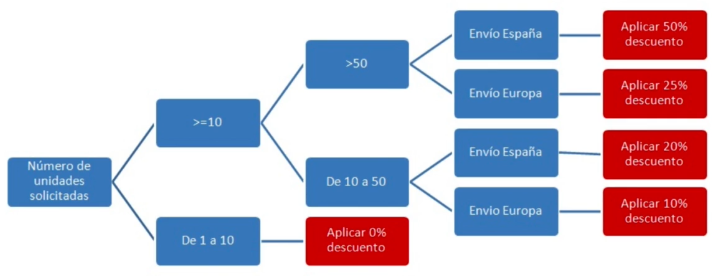
</details>

---
### Ejemplo Árboles de decisión - clasificación

In [27]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [31]:
cd ../resources/datasets

/home/aramos-m/Escritorio/IBM_AI/resources/datasets


In [35]:
vinos = pd.read_csv("vinos.csv")
vinos.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine Type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,One
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,One
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,One
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,One
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,One


In [39]:
vinos["Wine Type"].unique()

array(['One', 'Two', 'Three'], dtype=object)

In [41]:
vinos["Wine Type"].value_counts()

Wine Type
Two      71
One      59
Three    48
Name: count, dtype: int64

In [45]:
X = vinos.drop("Wine Type", axis=1)
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [51]:
y = vinos["Wine Type"]
y.head()

0    One
1    One
2    One
3    One
4    One
Name: Wine Type, dtype: object

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [59]:
X_train.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
21,12.93,3.80,2.65,18.6,102.0,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770.0
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0
68,13.34,0.94,2.36,17.0,110.0,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750.0
79,12.70,3.87,2.40,23.0,101.0,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463.0


In [61]:
X_test.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
61,12.64,1.36,2.02,16.8,100.0,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450.0
118,12.77,3.43,1.98,16.0,80.0,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372.0
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530.0
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0


In [68]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier()

In [70]:
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

In [74]:
predicciones = arbol.predict(X_test)
predicciones

array(['Three', 'Two', 'Three', 'Three', 'Three', 'Two', 'Three', 'Three',
       'Two', 'Three', 'Two', 'Two', 'One', 'One', 'One', 'Two', 'Three',
       'Three', 'Two', 'One', 'One', 'Three', 'Three', 'Two', 'Two',
       'One', 'One', 'Two', 'One', 'One', 'Two', 'Two', 'Three', 'Three',
       'One', 'Two', 'Three', 'One', 'One', 'Two', 'Two', 'One', 'Two',
       'Two', 'One', 'Three', 'Two', 'Two', 'One', 'Three', 'One', 'One',
       'Three', 'Three'], dtype=object)

In [78]:
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

         One       0.88      0.83      0.86        18
       Three       0.83      0.88      0.86        17
         Two       0.84      0.84      0.84        19

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54



In [82]:
print(confusion_matrix(y_test, predicciones))

[[15  1  2]
 [ 1 15  1]
 [ 1  2 16]]
